In [1]:
pip install numpy pandas matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN


In [3]:
def read_geolife_plt(file_path):
    df = pd.read_csv(file_path, skiprows=6, header=None)
    df.columns = ['lat', 'lon', 'zero', 'alt_ft', 'timestamp', 'date', 'time']
    return df[['lat', 'lon']].dropna().values


In [4]:
# Ruta a la carpeta de archivos .plt
folder = "C:\\Users\\Krlo\\OneDrive - Universidad Politécnica de Madrid\\Escritorio\\TFG\\Codigo\\Datos\\038\\Trajectory" 

def load_trajectories(folder):
    files = glob.glob(folder + "/*.plt")
    trajs = []
    for f in files:
        coords = read_geolife_plt(f)
        if len(coords) >= 30:  # Puedes ajustar el umbral
            norm_coords = MinMaxScaler().fit_transform(coords)
            trajs.append(norm_coords)
    return trajs

trajectories = load_trajectories(folder)
print(f"Trayectorias cargadas: {len(trajectories)}")


Trayectorias cargadas: 105


In [8]:
from sklearn.cluster import KMeans

def reducir_trayectoria_kmeans(puntos, n=50):
    kmeans = KMeans(n_clusters=n, random_state=0).fit(puntos)
    return kmeans.cluster_centers_

X = np.array([reducir_trayectoria_kmeans(traj, n=30).flatten() for traj in trajectories])
print(X.shape)  # (n_trayectorias, 100)


c:\Users\Krlo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Krlo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Krlo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Krlo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

(105, 60)


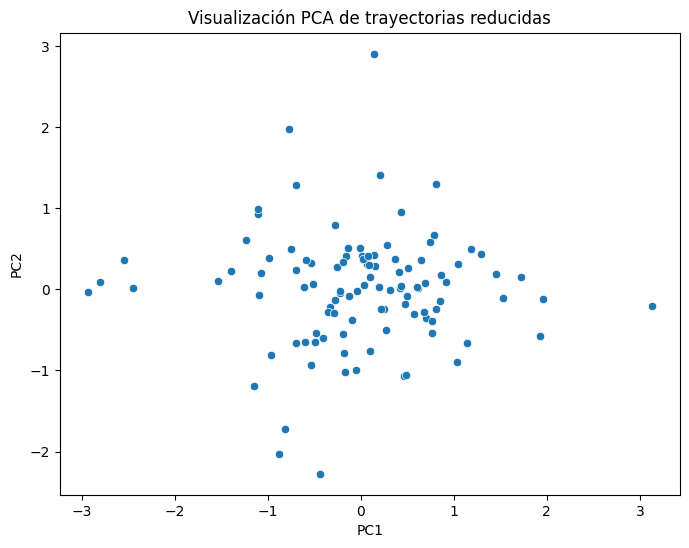

In [9]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1])
plt.title("Visualización PCA de trayectorias reducidas")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


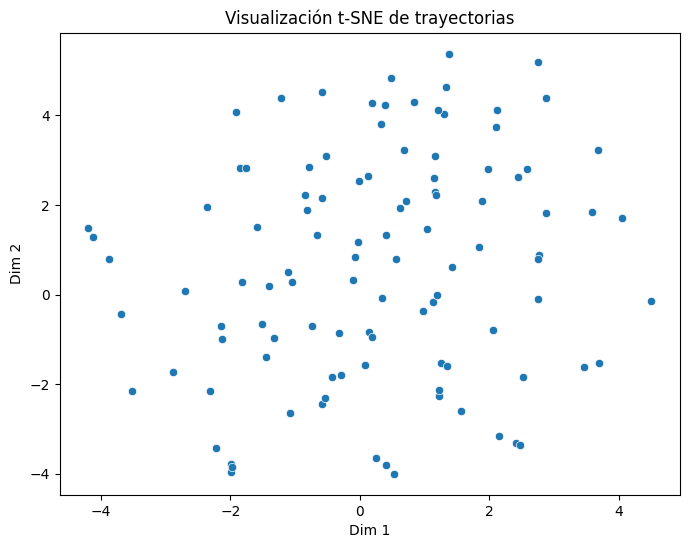

In [10]:
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
tsne_result = tsne.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1])
plt.title("Visualización t-SNE de trayectorias")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show()


c:\Users\Krlo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


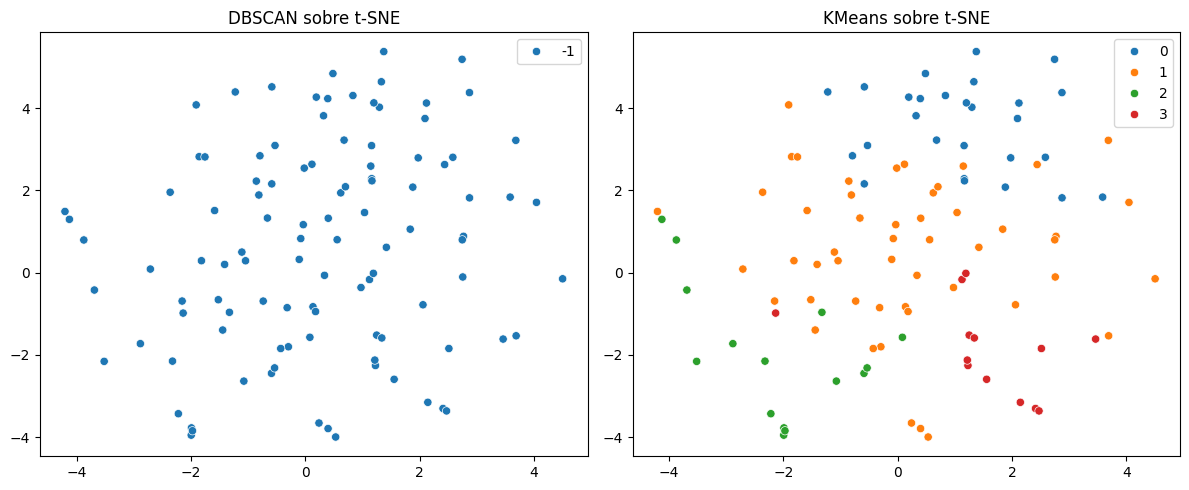

In [11]:
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=3)
labels_db = dbscan.fit_predict(X)

# KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
labels_km = kmeans.fit_predict(X)

# Visualización de clustering
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=labels_db, ax=axs[0], palette='tab10')
axs[0].set_title("DBSCAN sobre t-SNE")

sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=labels_km, ax=axs[1], palette='tab10')
axs[1].set_title("KMeans sobre t-SNE")
plt.tight_layout()
plt.show()


In [13]:
from sklearn.metrics import silhouette_score

# Silhouette for DBSCAN (only if there are at least 2 clusters, excluding noise)
n_clusters_db = len(set(labels_db)) - (1 if -1 in labels_db else 0)
if n_clusters_db >= 2:
	print("Silhouette (DBSCAN):", silhouette_score(X, labels_db))
else:
	print("Silhouette (DBSCAN): No valid clusters (all noise or only one cluster)")

print("Silhouette (KMeans):", silhouette_score(X, labels_km))


Silhouette (DBSCAN): No valid clusters (all noise or only one cluster)
Silhouette (KMeans): 0.04320739717661023
